In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [44]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as tp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [26]:
boston = load_boston()
data = boston.data
feature_names = boston.feature_names
target = boston.target


In [27]:
x = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(boston.target, columns=['price'])


In [29]:
x_train, x_test, y_train, y_test = tp(x, y, test_size=0.3, random_state=42)


In [41]:
lr = LinearRegression()

In [42]:
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(x_test)

In [45]:
r2_score(y_test, y_pred)

0.7112260057484908

### Задание 2

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
model = RandomForestRegressor(n_estimators=1000, max_depth= 12, random_state=42)

In [49]:
model.fit(x_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [52]:
y_pred = model.predict(x_test)

In [53]:
r2_score(y_test, y_pred)

0.87472606157312

#### Лес показывает себя значительно лучше. 0.711 VS 0.874

### Задание 3

In [54]:
? RandomForestRegressor

feature_importances_ : ndarray of shape (n_features,)
    The impurity-based feature importances.
    The higher, the more important the feature.
    The importance of a feature is computed as the (normalized)
    total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance.

    Warning: impurity-based feature importances can be misleading for
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.

In [74]:
importances = model.feature_importances_


array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [81]:
summa = np.sum(importances)
summa

1.0

<AxesSubplot:>

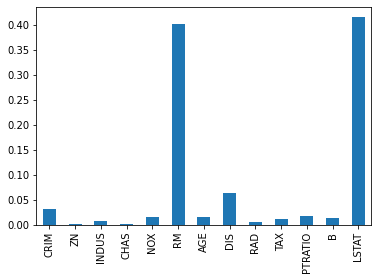

In [80]:
forest_importances = pd.Series(importances, index=boston.feature_names)


forest_importances.plot.bar()

#### Делаем вывод что максимальную важность имеют RM и LSTAT